# Linear Regression Assignment
## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Stage 1: Data Understanding and Preparation

### 1.1 Load and Explore the Data
Load the dataset and explore the first few rows to understand the structure

In [501]:
# Import nessary Libraries
import numpy as np
import pandas as pd
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [503]:
# Load the dataset
data = pd.read_csv('day.csv')

In [505]:
print(data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [507]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [509]:
print(data.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

### 1.2 Data Quality Checks
Check for missing values, duplicates and data types.

In [511]:
# Check for missing values
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [513]:
# Check for duplicate rows
print(data.duplicated().sum())

0


In [515]:
# Verify data types
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Categorical types using astype('category'), the data itself doesn't change in terms of values.
Instead, the data type of those columns is changed to category, which can help with memory efficiency and potentially improve performance in certain operations.

In [517]:
# convert data type to categorical 
data['mnth'] = data['mnth'].astype('category')
data['weekday'] = data['weekday'].astype('category')
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y')

### 1.3 Convert Categorical Variables
Convert season, weathersit, mnth, and weekday to categorical variables.
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy -> as **clear**
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist -> as **mist**
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + S -> as **light_rain**
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog -> as **heavy_rain**


In [519]:
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['yr'] = data['yr'].map({0: '2018', 1: '2019'})
data['mnth'] = data['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
data['weathersit'] = data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_rain', 4: 'heavy_rain'})
data['weekday'] = data['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [521]:
# Verify changes
print(data.head())

   instant     dteday  season    yr mnth  holiday    weekday  workingday  \
0        1 2018-01-01  spring  2018  Jan        0   Saturday           0   
1        2 2018-01-02  spring  2018  Jan        0     Sunday           0   
2        3 2018-01-03  spring  2018  Jan        0     Monday           1   
3        4 2018-01-04  spring  2018  Jan        0    Tuesday           1   
4        5 2018-01-05  spring  2018  Jan        0  Wednesday           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [523]:
print("Date Range:", data['dteday'].min(), "to", data['dteday'].max())

Date Range: 2018-01-01 00:00:00 to 2019-12-31 00:00:00


In [525]:
# Drop unnecessary columns like 'instant' and 'atemp' (since 'temp' is sufficient)
data.drop(['instant', 'atemp'], axis=1, inplace=True)

### 1.4 Outliers detection
Since we don't have missing values in this dataset, detect if any outliers

In [527]:
# Outlier detection and handling
import matplotlib.pyplot as plt
import seaborn as sns

In [529]:
# Calculate basic statistics for 'cnt'
cnt_stats = data['cnt'].describe()
print(cnt_stats)

# Calculate IQR (Interquartile Range)
Q1 = data['cnt'].quantile(0.25)
Q3 = data['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['cnt'] < lower_bound) | (data['cnt'] > upper_bound)]
print("Outliers:")
print(outliers[['dteday', 'cnt']])

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64
Outliers:
Empty DataFrame
Columns: [dteday, cnt]
Index: []


**No Outliers Detected:** According to the statistics provided (mean, min, max, quartiles), there are no values of 'cnt' that fall below the lower bound or above the upper bound calculated using the IQR method. 
This suggests that all values of 'cnt' are within a reasonable range based on this statistical measure.

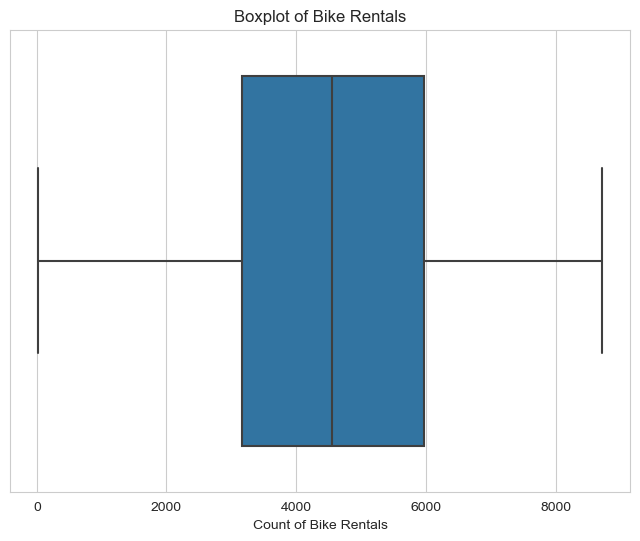

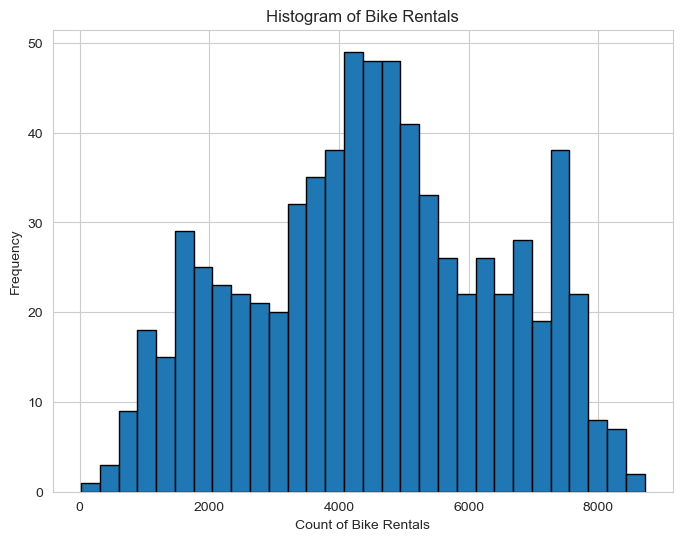

In [531]:
# Box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['cnt'])
plt.title('Boxplot of Bike Rentals')
plt.xlabel('Count of Bike Rentals')
plt.show()

# Histogram to visualize distribution
plt.figure(figsize=(8, 6))
plt.hist(data['cnt'], bins=30, edgecolor='black')
plt.title('Histogram of Bike Rentals')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

### 1.5 Visualising the Data

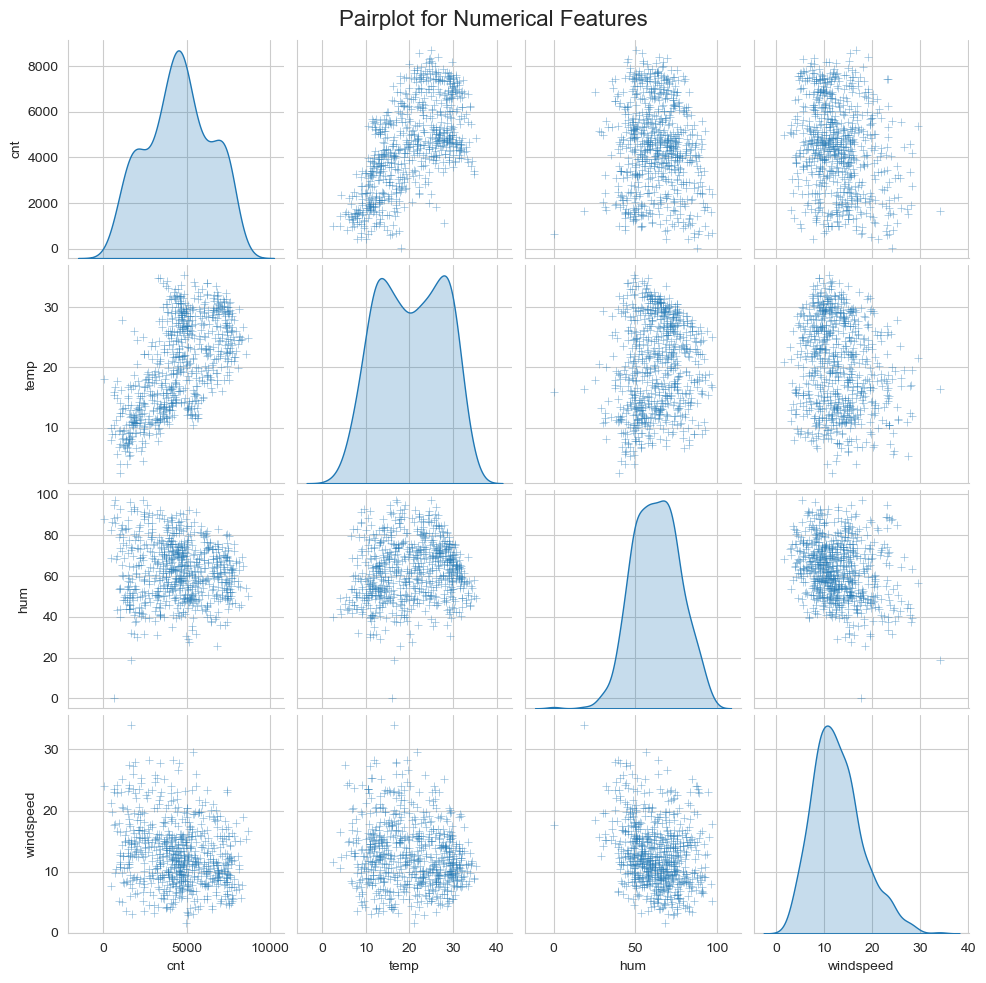

In [535]:
# Pairplots visualize relationships between multiple variables through scatter plots and histograms
sns.pairplot(data[['cnt', 'temp', 'hum', 'windspeed']], diag_kind='kde', markers='+', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot for Numerical Features', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

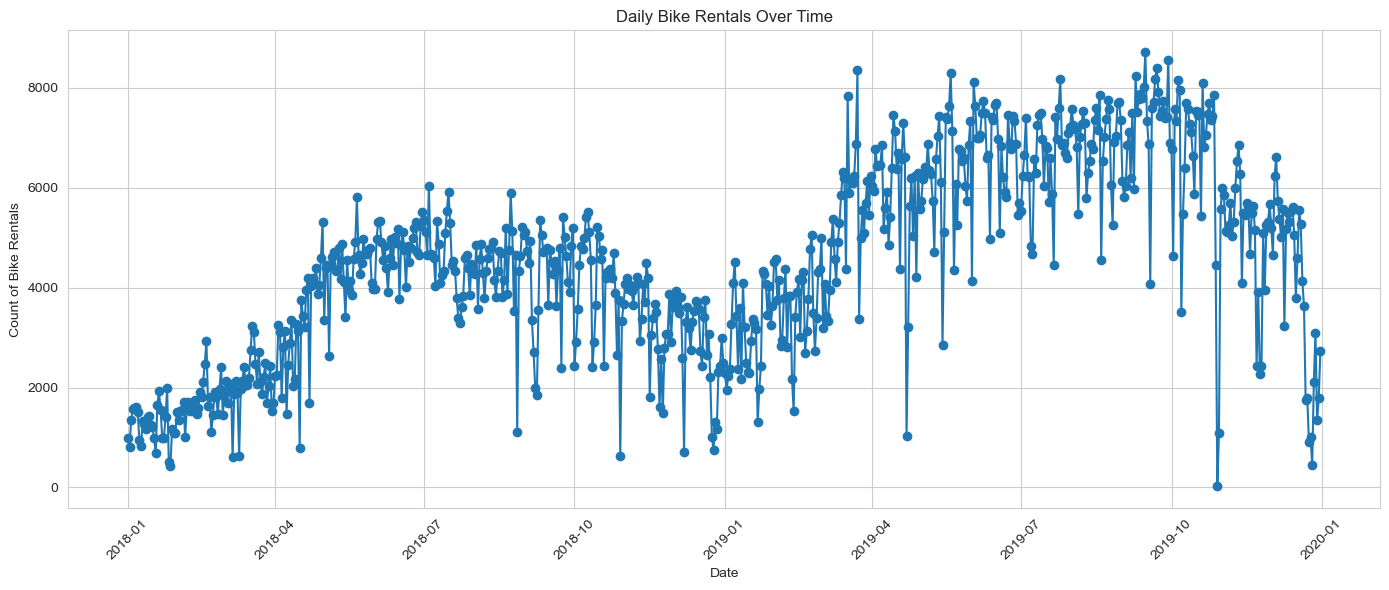

In [537]:
#Visualizing the trend of bike rentals over time can give insights into seasonal patterns or trends
plt.figure(figsize=(14, 6))
plt.plot(data['dteday'], data['cnt'], marker='o', linestyle='-')
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Bike Rentals')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

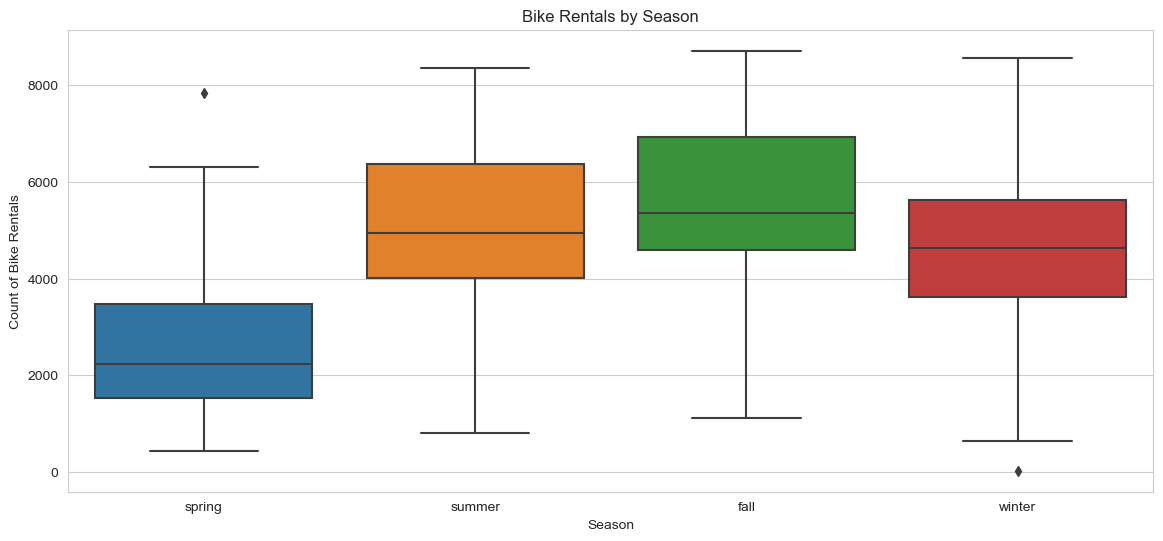

In [539]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Count of Bike Rentals')
plt.show()

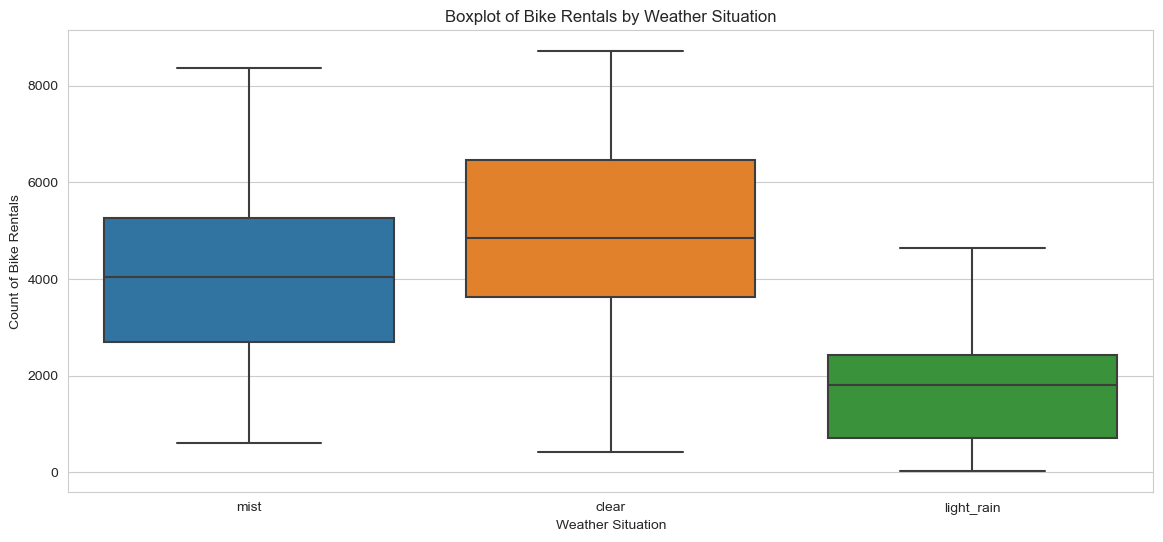

In [541]:
# Boxplot for Weather Situation vs. Total Bike Rentals
plt.figure(figsize=(14, 6))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Boxplot of Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Count of Bike Rentals')
plt.show()

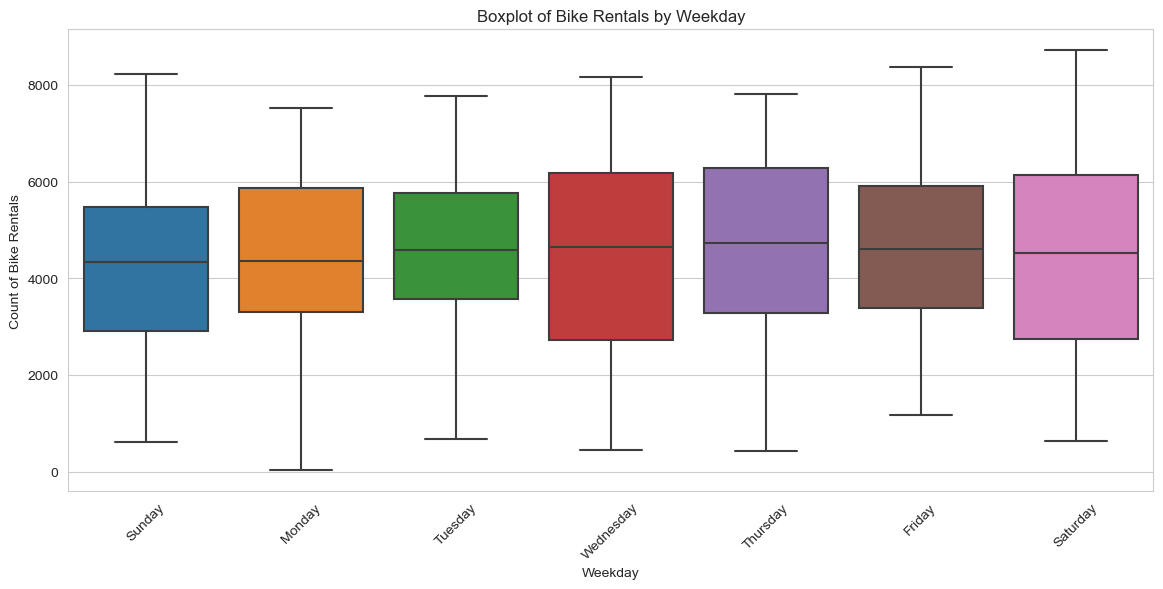

In [545]:
# Plot the boxplot with weekday names
plt.figure(figsize=(14, 6))
sns.boxplot(x='weekday', y='cnt', data=data)
plt.title('Boxplot of Bike Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count of Bike Rentals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

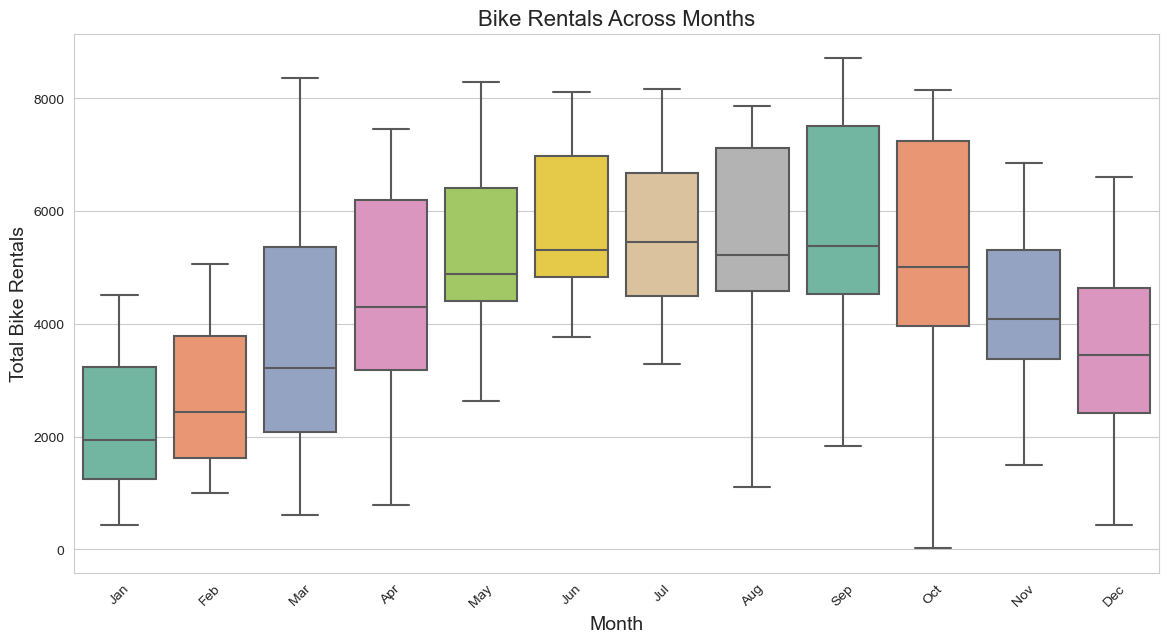

In [547]:
# Boxplot for Month vs. Total Bike Rentals
plt.figure(figsize=(14, 7))
sns.boxplot(x='mnth', y='cnt', data=data, palette='Set2')
plt.title('Bike Rentals Across Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Bike Rentals', fontsize=14)
plt.xticks(rotation=45)

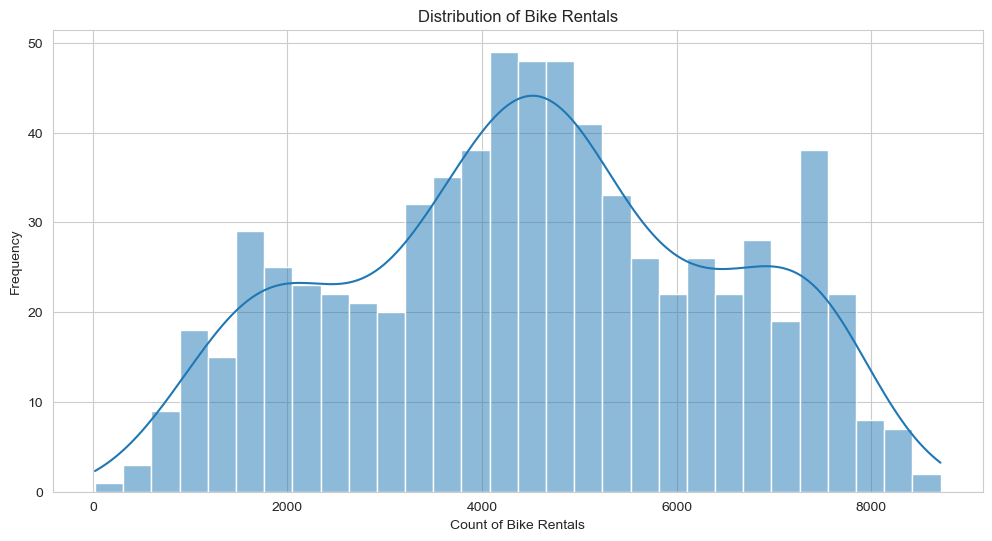

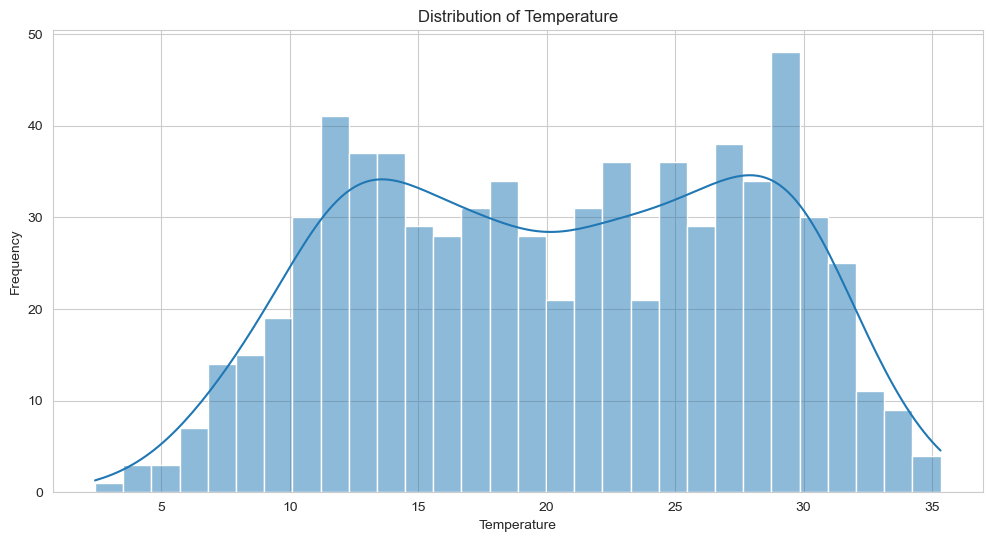

In [549]:
# Histograms and kernel density plots show the distribution of numeric variables.
plt.figure(figsize=(12, 6))
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['temp'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

### 1.6 Dummy Variables

In [559]:
bike_data = data
# Create dummy variables
bike_data_dummies = pd.get_dummies(data, columns=['season', 'weathersit', 'yr', 'mnth', 'weekday'], drop_first=True)

# Drop columns that are not necessary for the model
bike_data_dummies = bike_data_dummies.drop(columns=['dteday', 'casual', 'registered'])

# Display the first few rows of the modified dataset
bike_data_dummies.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_rain,...,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday
0,0,0,14.110847,80.5833,10.749882,985,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,14.902598,69.6087,16.652113,801,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1,8.050924,43.7273,16.636703,1349,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,1,8.200000,59.0435,10.739832,1562,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,1,9.305237,43.6957,12.522300,1600,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [561]:
# Summary statistics after filling missing values and creating dummy variables
summary_stats = bike_data_dummies.describe()
summary_stats

,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


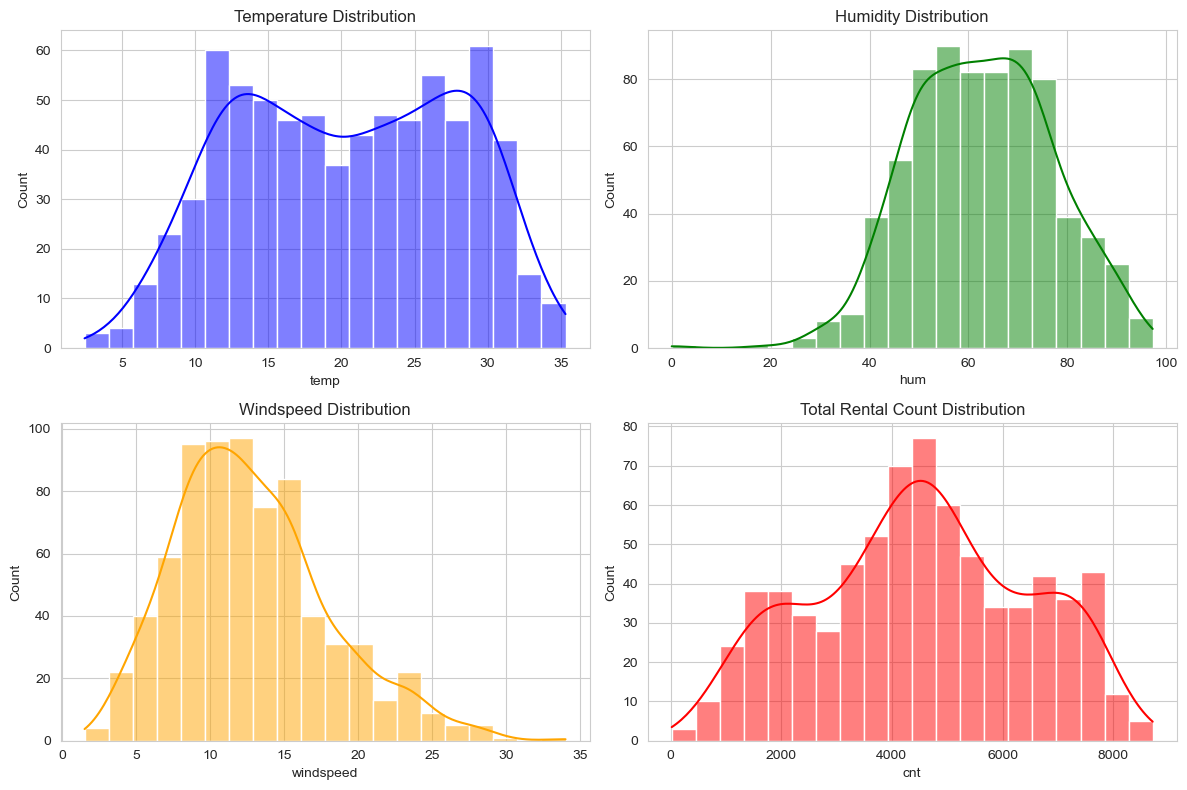

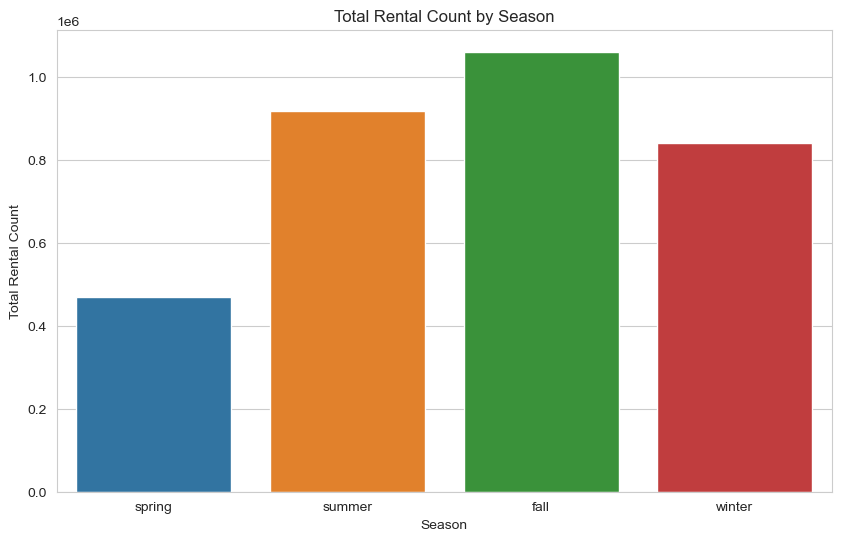

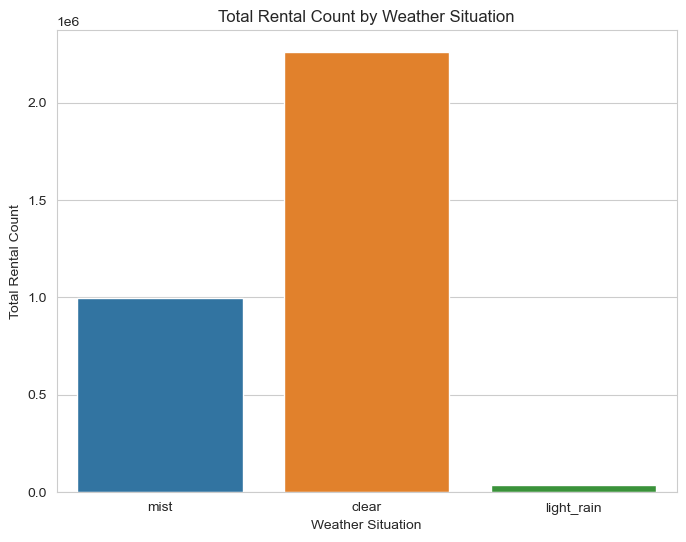

In [569]:
# Filling missing values
numeric_cols = ['temp', 'hum', 'windspeed']
bike_data[numeric_cols] = bike_data[numeric_cols].fillna(bike_data[numeric_cols].mean())

# Distribution plots after handling missing values
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(bike_data['temp'], bins=20, kde=True, color='blue')
plt.title('Temperature Distribution')

plt.subplot(2, 2, 2)
sns.histplot(bike_data['hum'], bins=20, kde=True, color='green')
plt.title('Humidity Distribution')

plt.subplot(2, 2, 3)
sns.histplot(bike_data['windspeed'], bins=20, kde=True, color='orange')
plt.title('Windspeed Distribution')

plt.subplot(2, 2, 4)
sns.histplot(bike_data['cnt'], bins=20, kde=True, color='red')
plt.title('Total Rental Count Distribution')

plt.tight_layout()
plt.show()

# Seasonal demand plot
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=bike_data, estimator=sum, ci=None)
plt.title('Total Rental Count by Season')
plt.xlabel('Season')
plt.ylabel('Total Rental Count')
plt.show()

# Weather situation vs. demand
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=bike_data, estimator=sum, ci=None)
plt.title('Total Rental Count by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rental Count')
plt.show()

# Stage 2: Splitting the Data into Training and Testing Sets

In [575]:
from sklearn.model_selection import train_test_split

bike_data_m = bike_data_dummies

# Define the feature variables and the target variable
# 'cnt': This is the target variable representing the total number of bike rentals, so it needs to be separated from the features.
# 'casual' and 'registered': These columns are components of the 'cnt' variable (casual + registered = cnt). Including them in the feature set would lead to data leakage, where the model might directly learn the target variable instead of the underlying patterns.
X = bike_data_m.drop(columns=['cnt'])
y = bike_data_m['cnt']

# Split data into training and testing sets
# train_size=0.7 means 70% of the data will be used for training
# test_size=0.3 means 30% of the data will be used for testing
# random_state=100 ensures the split is reproducible and consistent across different runs
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [577]:
X.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_light_rain',
       'weathersit_mist', 'yr_2019', 'mnth_Feb', 'mnth_Mar', 'mnth_Apr',
       'mnth_May', 'mnth_Jun', 'mnth_Jul', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct',
       'mnth_Nov', 'mnth_Dec', 'weekday_Monday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday',
       'weekday_Saturday'],
      dtype='object')

### 2.1 Feature Scaling
Apply scaling techniques (such as standardization or normalization) to ensure all features have a comparable scale, which improves model performance and interpretability.

In [579]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' and 'X_test' are already defined from train_test_split
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [581]:
# Convert the scaled data back to a DataFrame for easier plotting
X_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
y_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

In [583]:
# Display the first few rows of the scaled training data
print("First few rows of the scaled training data:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

# Summary statistics of scaled features
print("\nSummary statistics of scaled features:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).describe())

First few rows of the scaled training data:
    holiday  workingday      temp       hum  windspeed  season_spring  \
0 -0.161731    0.691564 -0.121335 -0.514725  -0.117752      -0.566783   
1 -0.161731    0.691564  1.231731  0.516433  -0.330615      -0.566783   
2 -0.161731   -1.445998 -0.420478 -0.069854  -0.385694       1.764342   
3 -0.161731   -1.445998 -1.294913 -1.045032   2.018143       1.764342   
4 -0.161731   -1.445998 -0.627580 -1.000840  -0.779889      -0.566783   

   season_summer  season_winter  weathersit_light_rain  weathersit_mist  ...  \
0      -0.569803       1.736591              -0.174078        -0.722764  ...   
1      -0.569803      -0.575841              -0.174078        -0.722764  ...   
2      -0.569803      -0.575841              -0.174078         1.383577  ...   
3      -0.569803      -0.575841              -0.174078        -0.722764  ...   
4       1.754993      -0.575841              -0.174078         1.383577  ...   

   mnth_Sep  mnth_Oct  mnth_Nov  mnt

Visualizing the features before and after scaling provides insights into how the data is transformed, ensuring that the preprocessing step of scaling is correctly applied

Visulization helps us to understand 
1. Original data distribution and detects potential issues like outliers 
2. Scaled process has standardized the features, ensuring they contribute equally during model training

In [585]:
import math

def plot_histograms(data, title):
    num_features = data.shape[1]
    num_cols = 4  # Number of columns in the subplot grid
    num_rows = math.ceil(num_features / num_cols)  # Calculate rows needed

    plt.figure(figsize=(num_cols * 5, num_rows * 4))  # Adjust figure size dynamically
    for i, column in enumerate(data.columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(data[column], kde=True)
        plt.title(f'{title} - {column}')
    plt.tight_layout()
    plt.show()

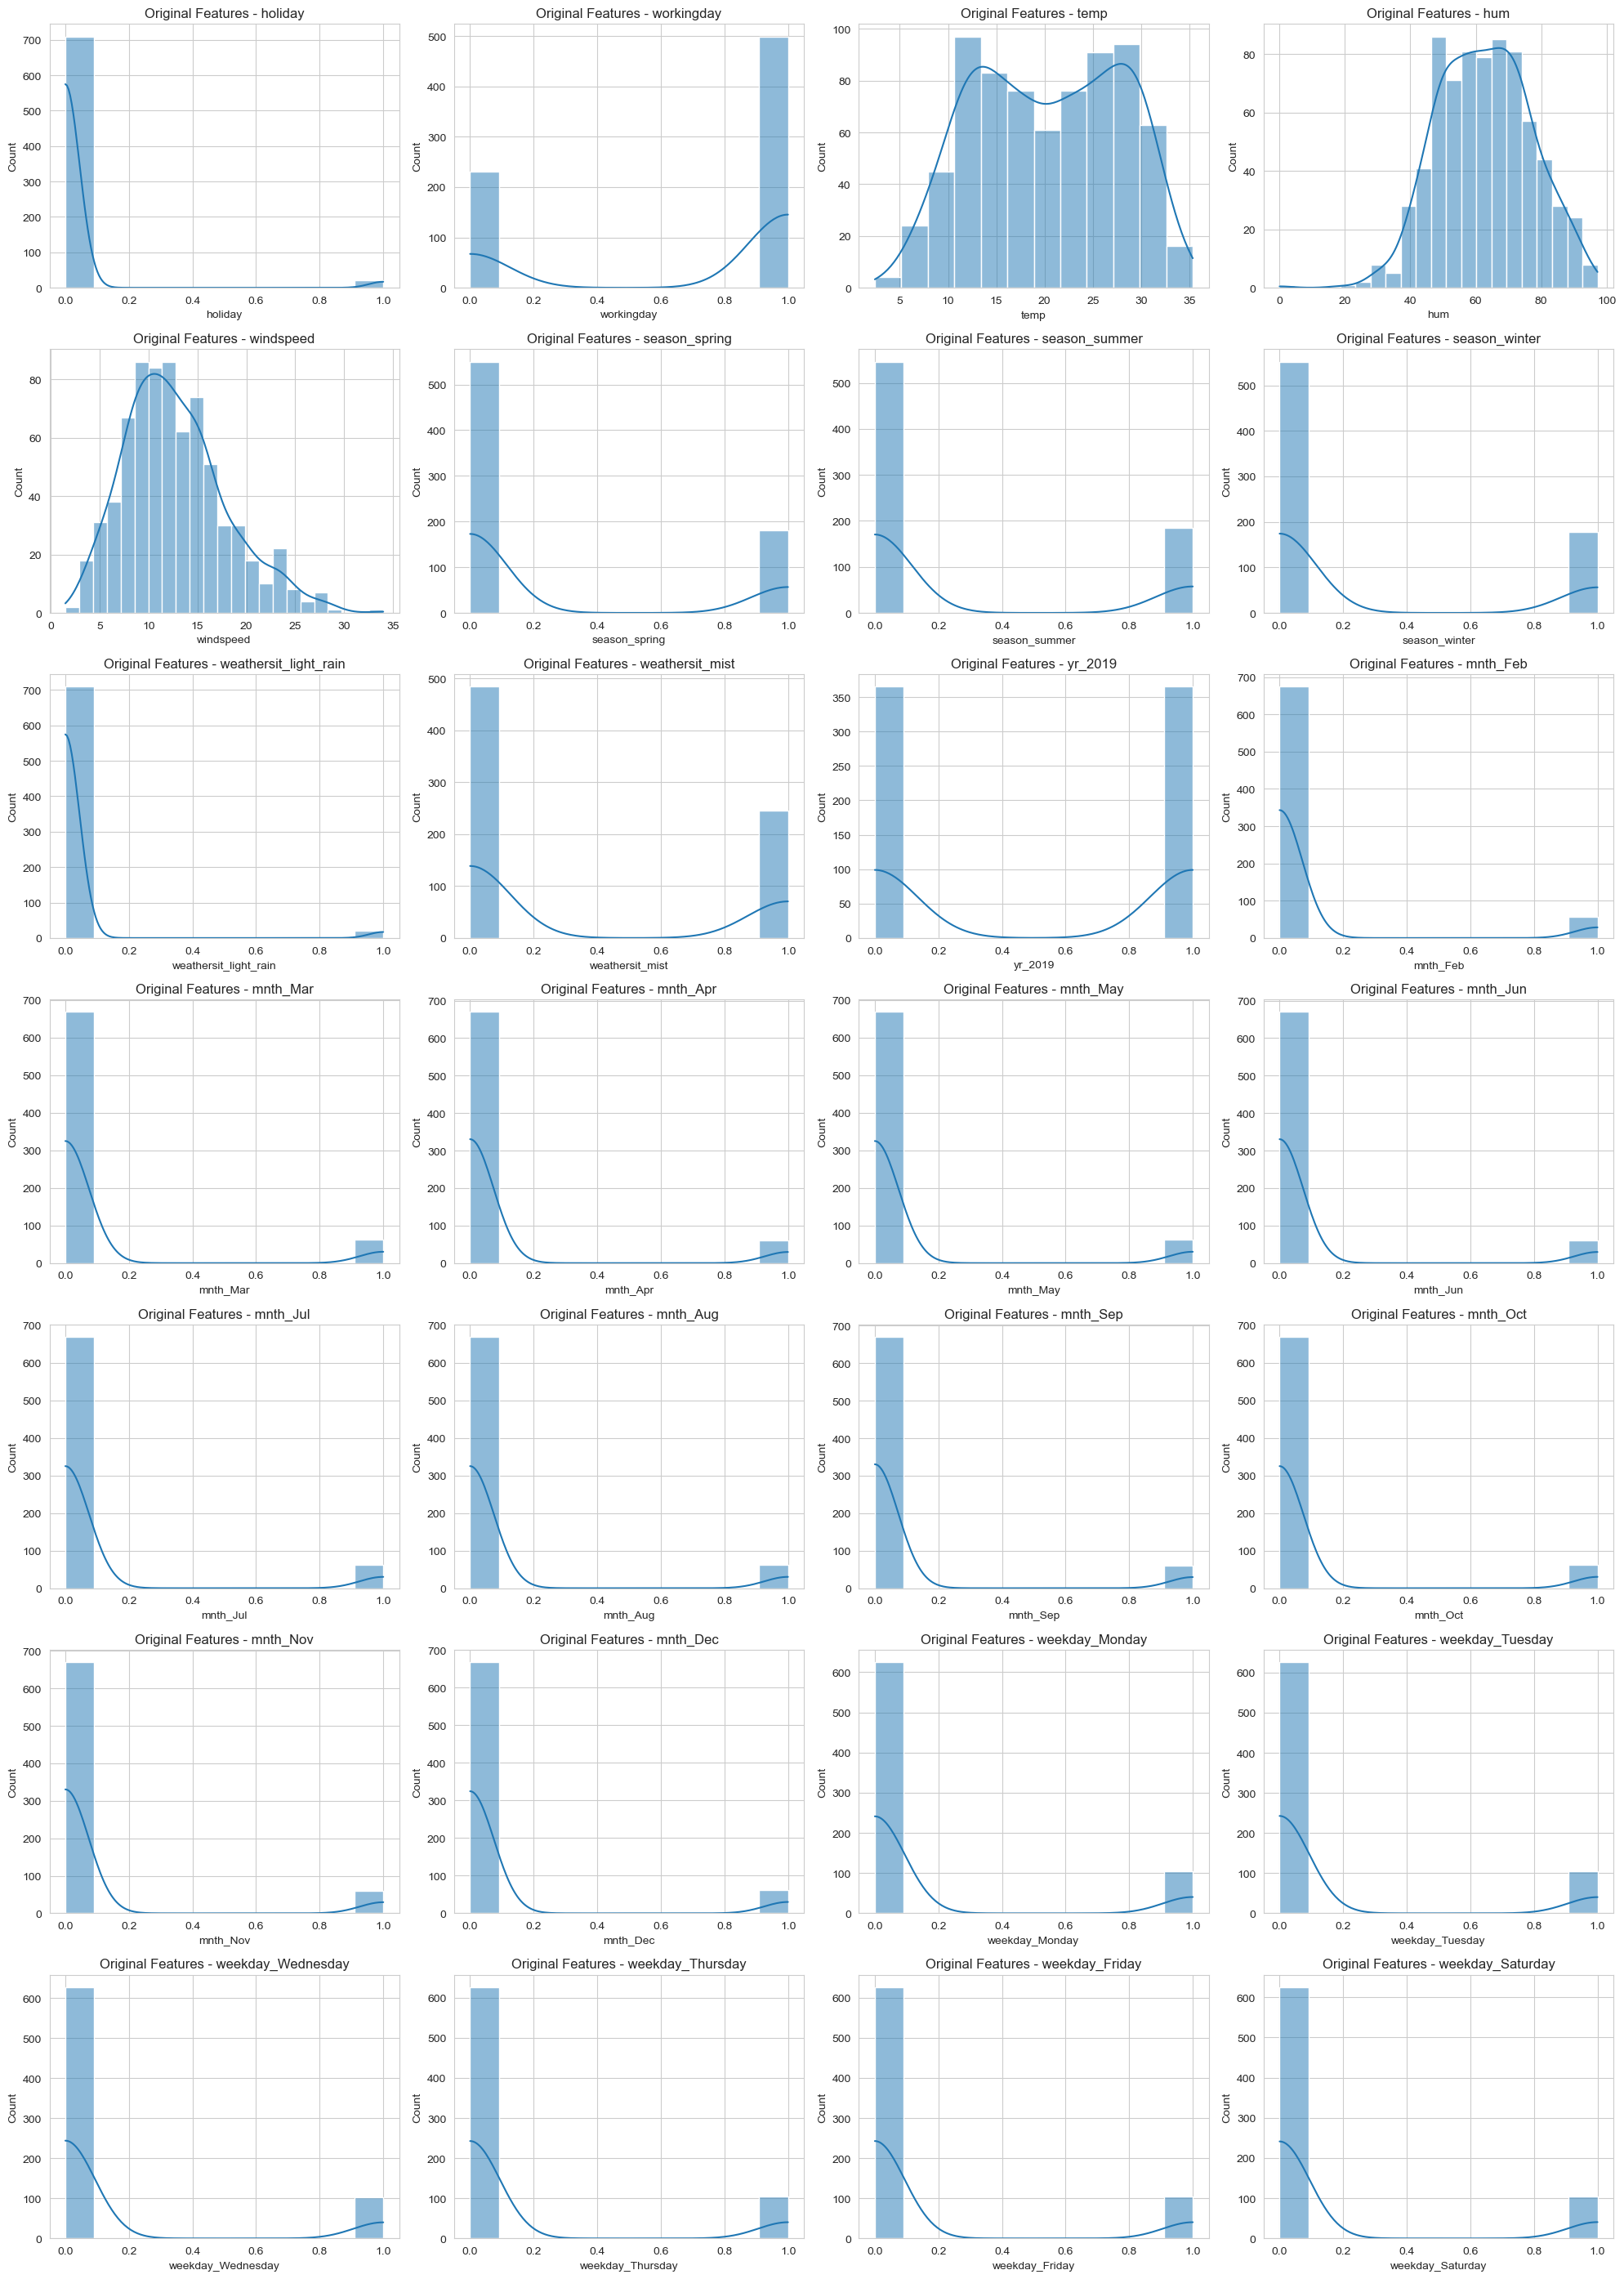

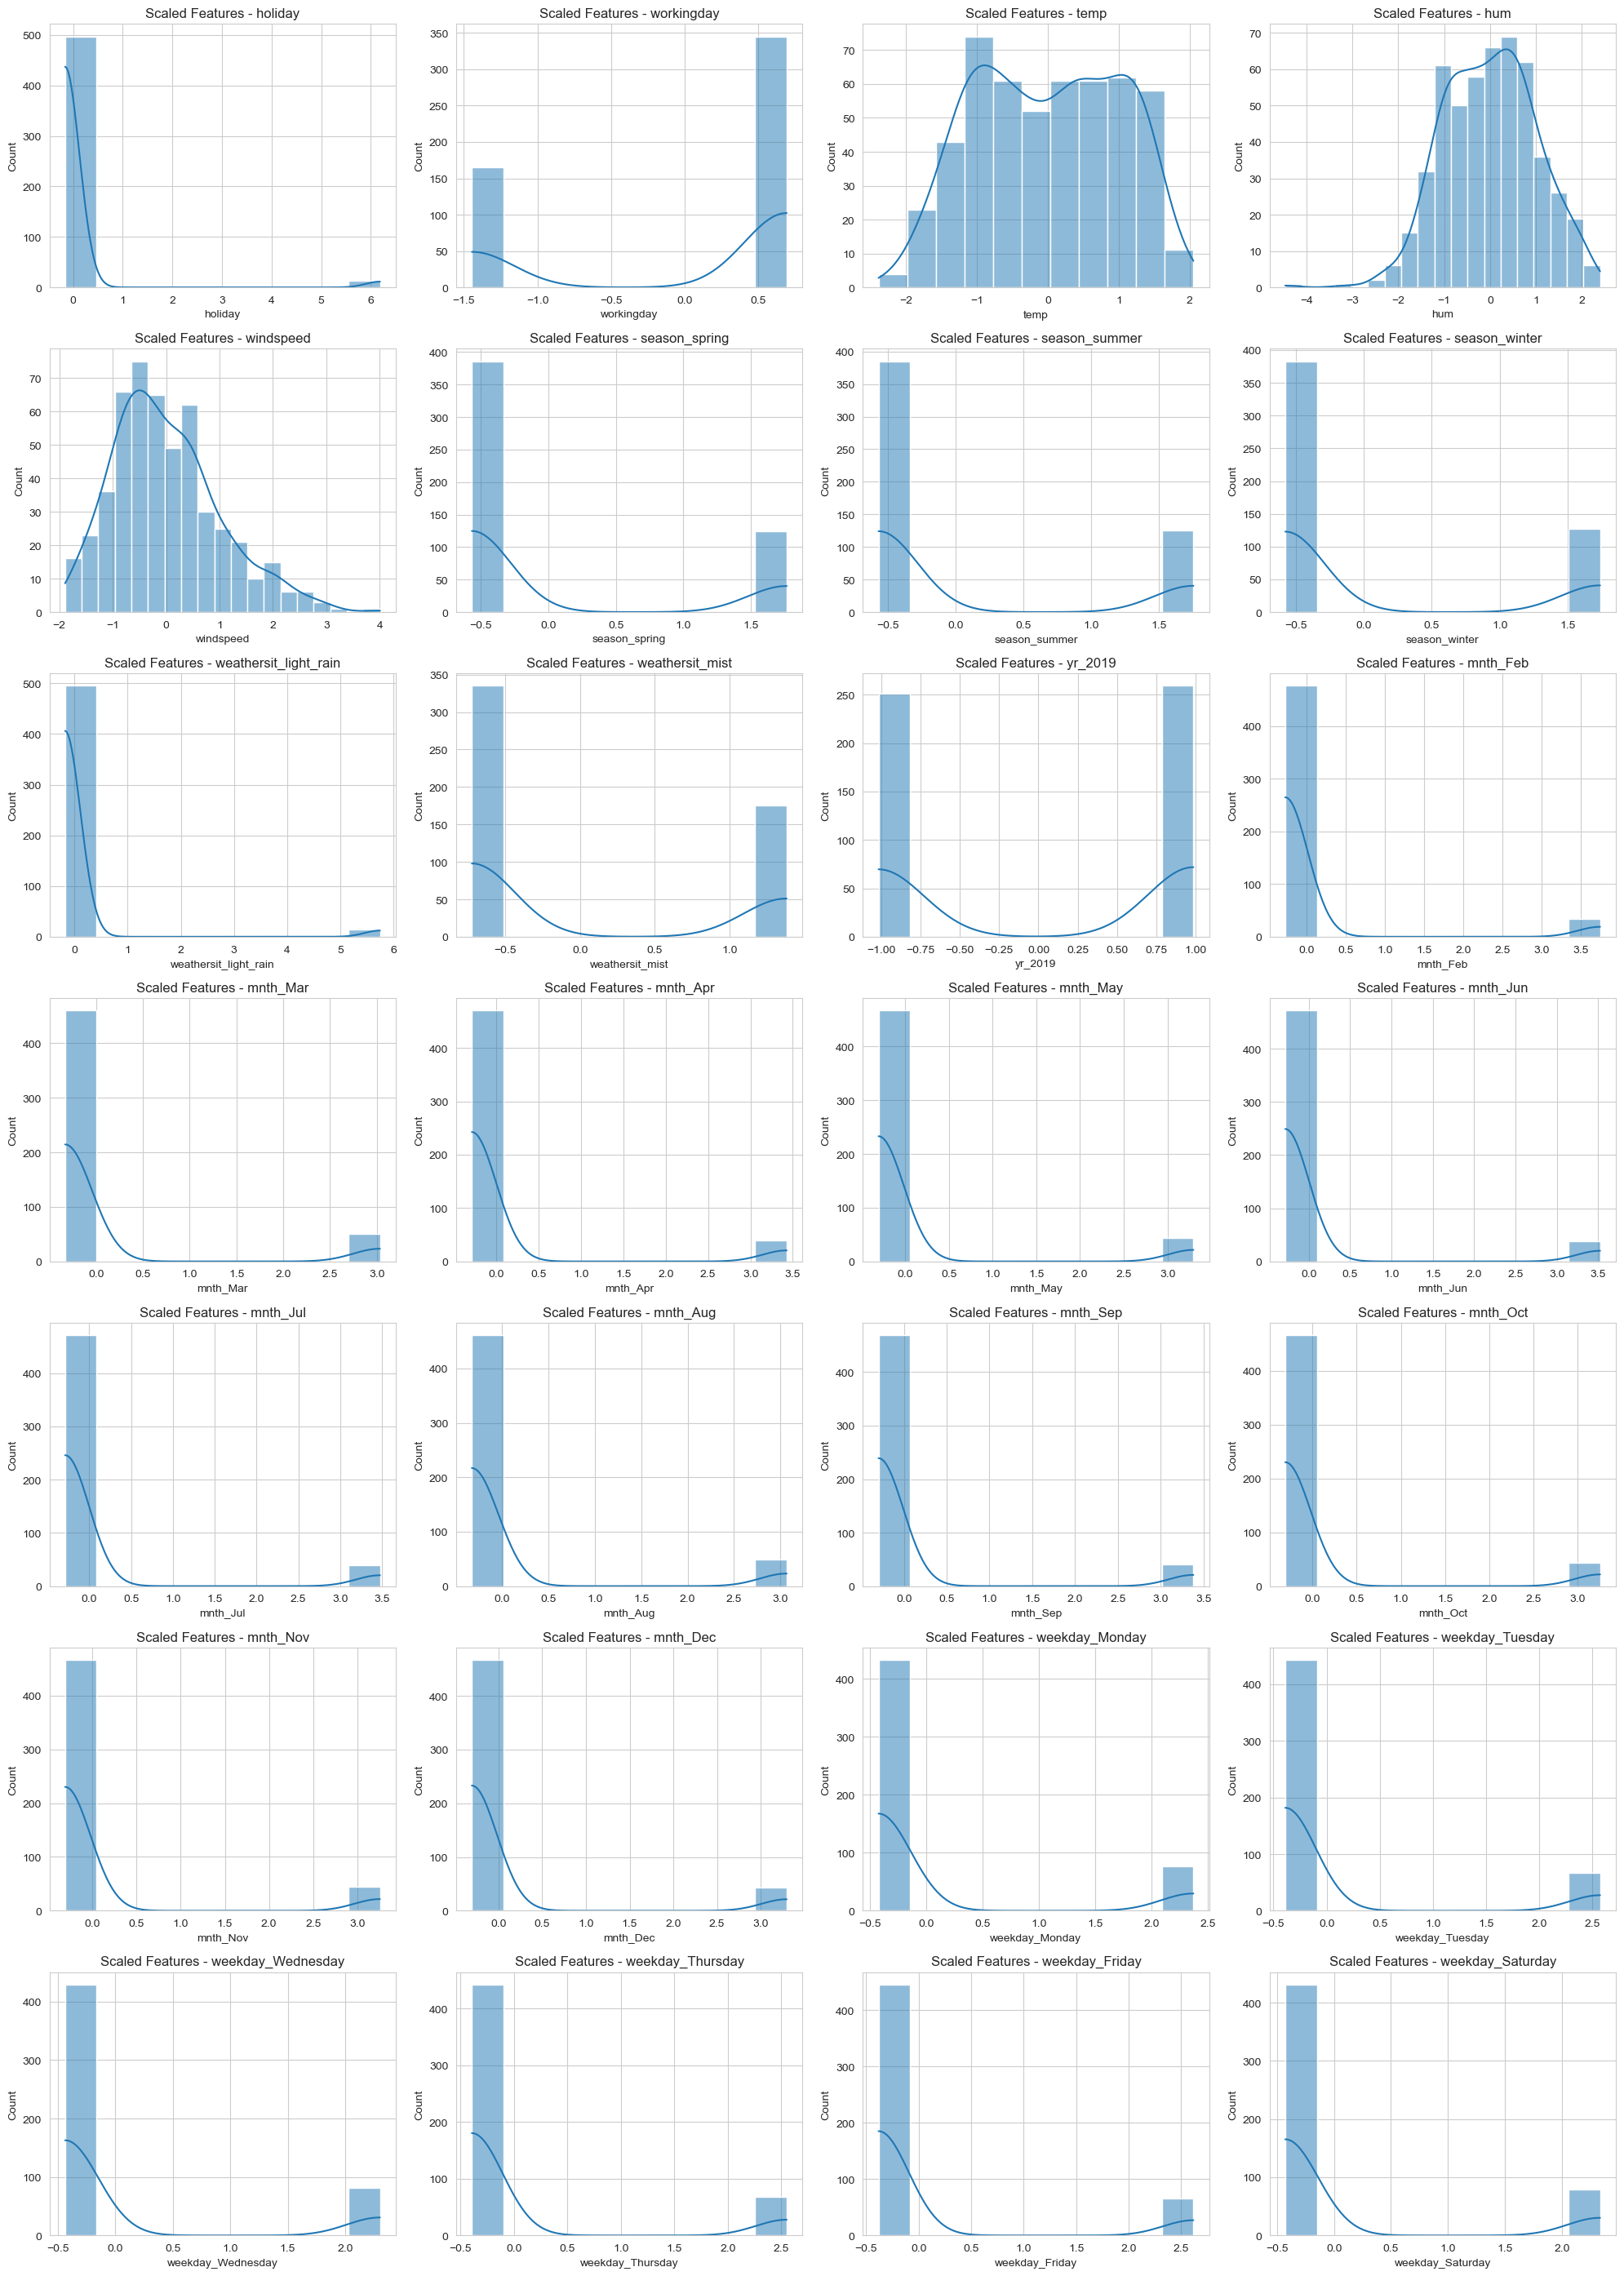

In [587]:
# Plot original features
plot_histograms(X, 'Original Features')

# Plot scaled features
plot_histograms(X_scaled_df, 'Scaled Features')

# Stage 3: Model Building and Predictions

In [591]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Fit the model with selected features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

model.fit(X_train_selected, y_train)

LinearRegression()

In [593]:
# Print coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(selected_features, model.coef_)))

Intercept: 4486.382352941177
Coefficients: {'workingday': 94.27522050927764, 'temp': 1123.6247369327864, 'hum': -220.45516055103747, 'windspeed': -274.13910066566797, 'season_summer': 337.0690807948046, 'season_winter': 527.0105777545944, 'weathersit_light_rain': -345.1087458916278, 'weathersit_mist': -211.5417114961825, 'yr_2019': 993.4280859985616, 'mnth_Sep': 243.9489483592738}


### 3.1 Model Prediction
Model Performance: R-squared values (r2_train and r2_test) assess how well the model fits the data on both training and test sets.

In [595]:
# Predictions on training and test sets
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

In [597]:
# Calculate R-squared on training and test sets
from sklearn.metrics import r2_score

# Calculate R-squared and RMSE on training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('R-squared on Training set:', r2_train)
print('R-squared on Test set:', r2_test)
print('RMSE on Training set:', rmse_train)
print('RMSE on Test set:', rmse_test)

R-squared on Training set: 0.8353443109027985
R-squared on Test set: 0.8022212644242877
RMSE on Training set: 791.3658456564341
RMSE on Test set: 842.4364638896132


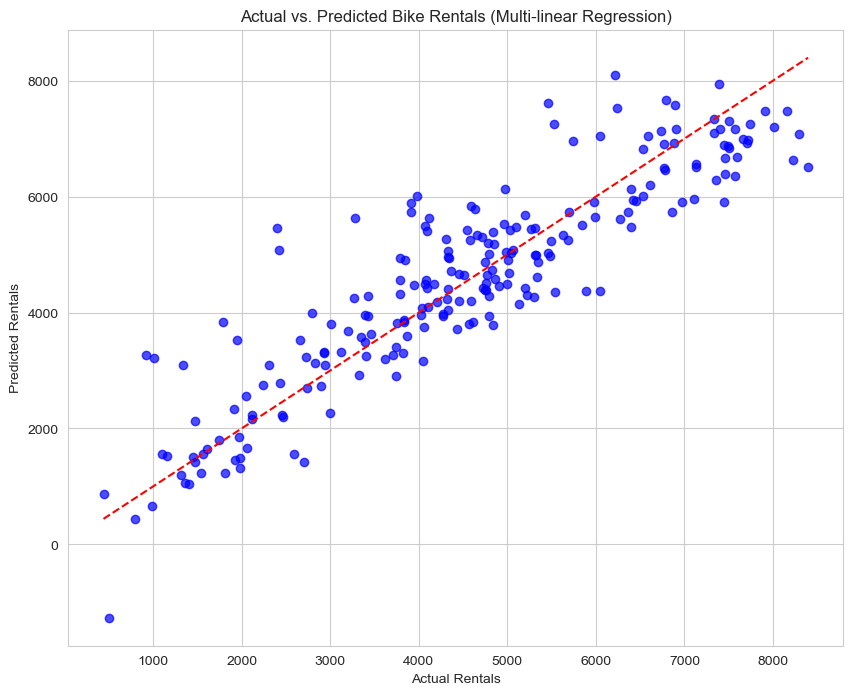

In [599]:
# Plot Actual vs Predicted for Test set
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs. Predicted Bike Rentals (Multi-linear Regression)')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.grid(True)
plt.show()

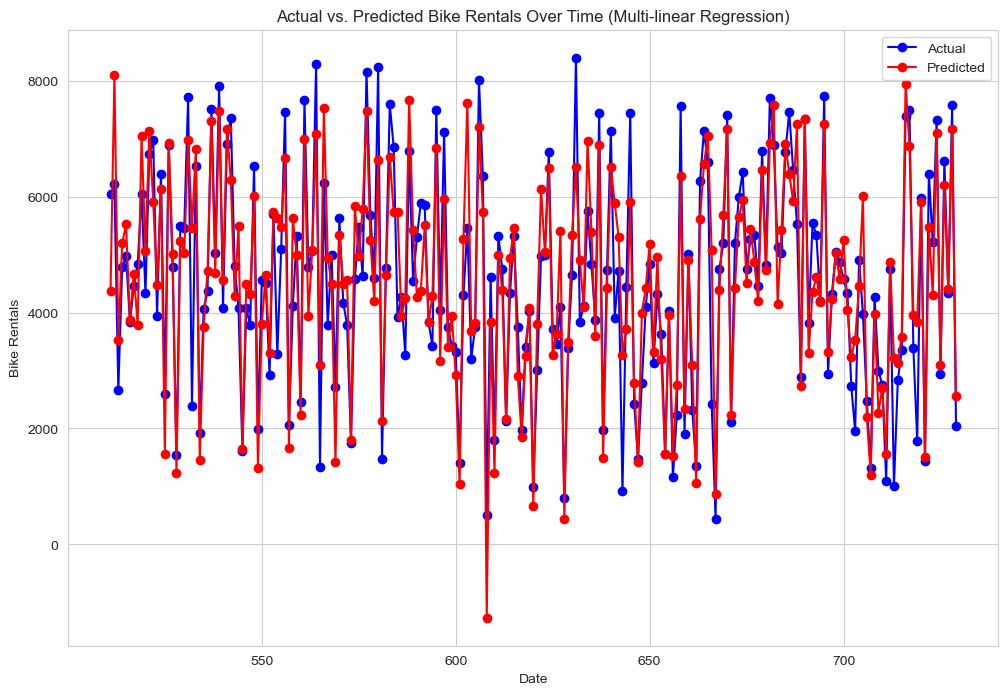

In [601]:
# Actual vs Predicted over time for Test set
plt.figure(figsize=(12, 8))
plt.plot(bike_data.index[-len(y_test):], y_test, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(bike_data.index[-len(y_test):], y_pred_test, marker='o', linestyle='-', color='red', label='Predicted')
plt.title('Actual vs. Predicted Bike Rentals Over Time (Multi-linear Regression)')
plt.xlabel('Date')
plt.ylabel('Bike Rentals')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Residual Analysis and Predictions

1. Residual Analysis: Helps in diagnosing the model's performance and identifying any patterns or biases in predictions.
2. Visualization: Clear and concise plots using matplotlib and seaborn libraries enhance understanding of model behavior and residuals.

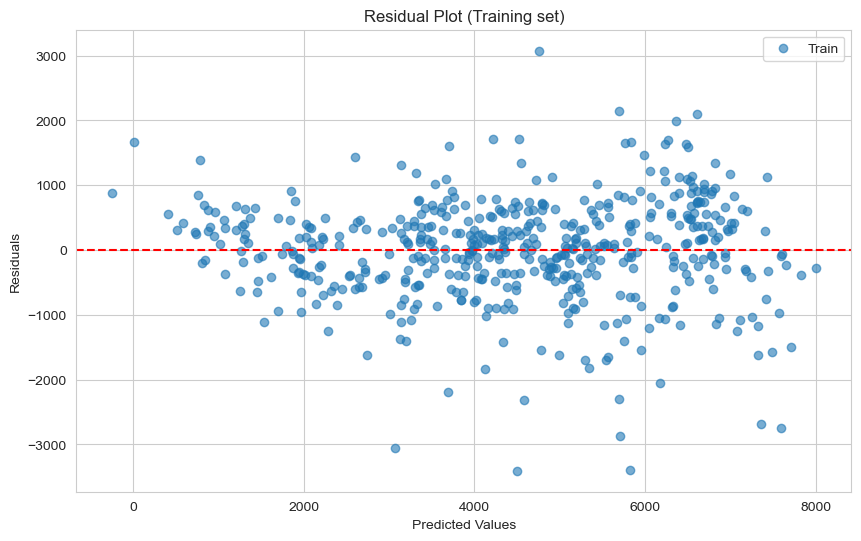

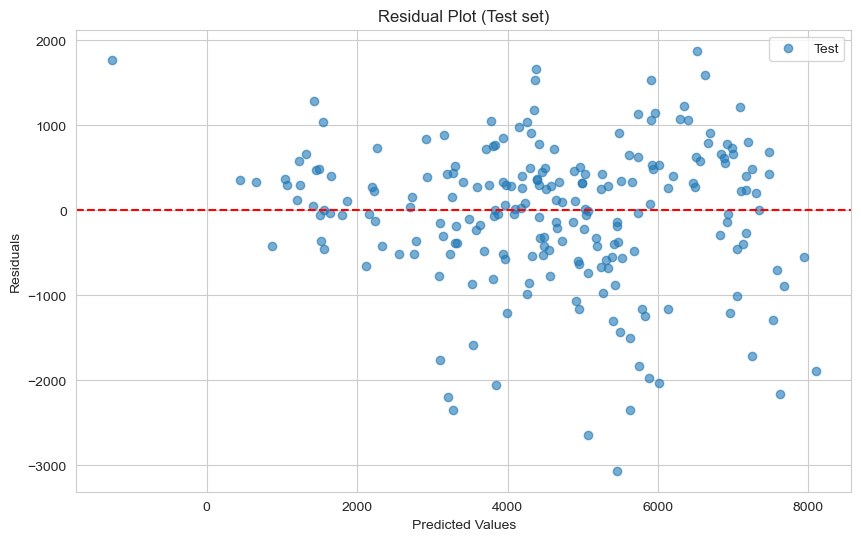

In [605]:
# Residual Analysis
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Residual Plot for Training set
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6, label='Train')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Training set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Residual Plot for Test set
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_test, alpha=0.6, label='Test')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Test set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

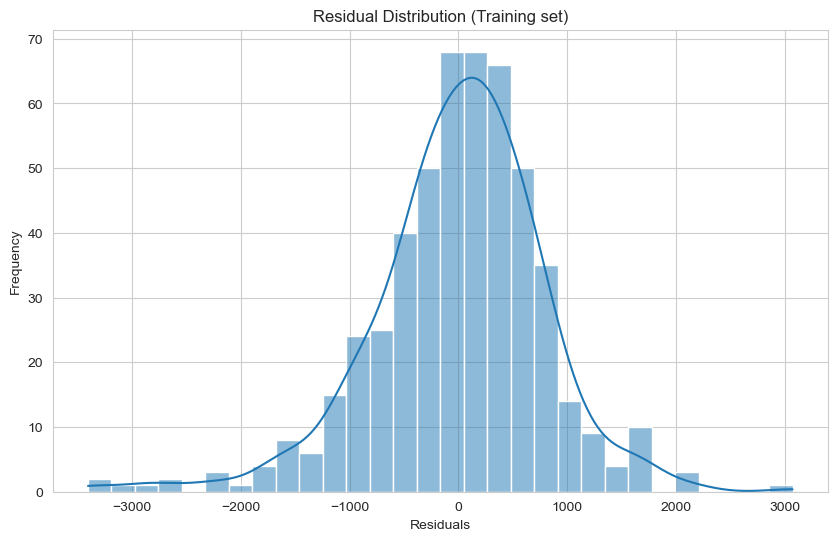

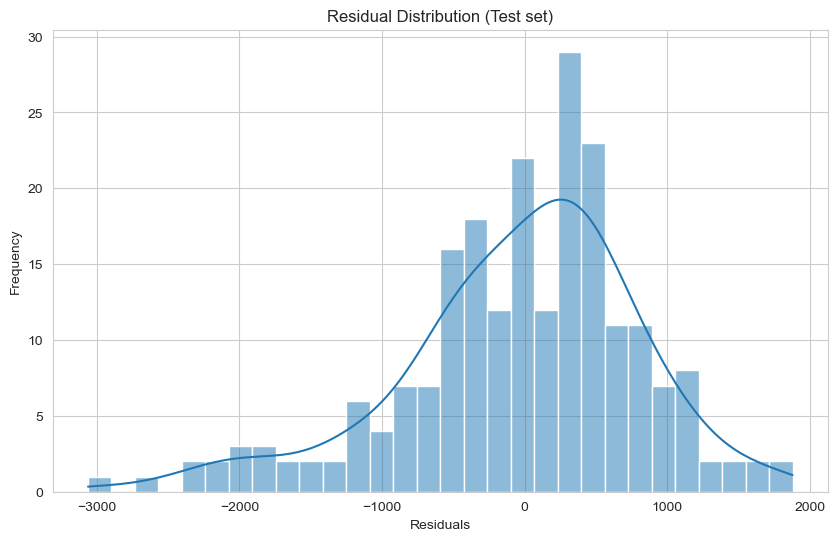

In [607]:
# Residual Distribution for Training set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_train, bins=30, kde=True)
plt.title('Residual Distribution (Training set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residual Distribution for Test set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_test, bins=30, kde=True)
plt.title('Residual Distribution (Test set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### 3.3 Variable Importance Plot (VIP) using statsmodels

In [611]:
import statsmodels.api as sm

X_train_selected_sm = sm.add_constant(X_train_selected)
ols_model = sm.OLS(y_train, X_train_selected_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.2
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.82e-188
Time:                        16:06:40   Log-Likelihood:                -4127.3
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     499   BIC:                             8323.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4486.3824     35.426    126.640      0.0

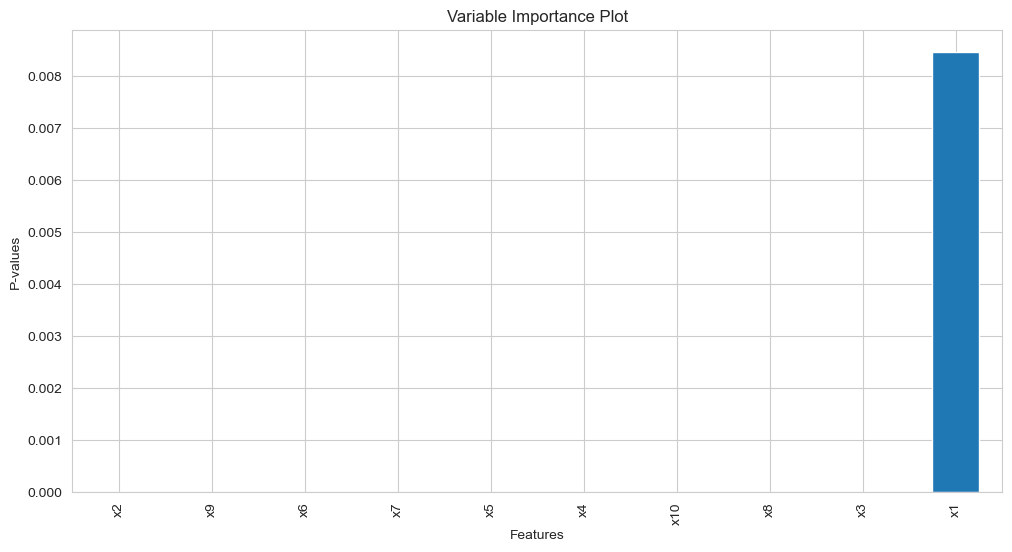

In [613]:
# Extract p-values and plot VIP
p_values = ols_model.pvalues[1:]  # Exclude the intercept
p_values = p_values.sort_values()

plt.figure(figsize=(12, 6))
p_values.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('P-values')
plt.title('Variable Importance Plot')
plt.show()

# Stage 4: Model Evaluation 

In [616]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred_test = model.predict(X_test_selected)

# Calculate R-squared on test set
r2_test = r2_score(y_test, y_pred_test)
print(f'R-squared on Test set: {r2_test:.2f}')


R-squared on Test set: 0.80


In [618]:
# Calculate other metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(f'Mean Squared Error on Test set: {mse_test:.2f}')
print(f'Mean Absolute Error on Test set: {mae_test:.2f}')
print(f'Root Mean Squared Error on Test set: {rmse_test:.2f}')

Mean Squared Error on Test set: 709699.20
Mean Absolute Error on Test set: 636.88
Root Mean Squared Error on Test set: 842.44


# Conclusion for the Overall Problem Statement

Based on the evaluation metrics:

1. R-squared (Coefficient of Determination):

- Training set: R-squared of 0.8353 indicates that approximately 83.53% of the variance in the target variable (bike rentals) is explained by the model. This suggests a good fit of the model to the training data.
- Test set: R-squared of 0.8022 indicates that around 80.22% of the variance in the bike rentals is explained by the model on unseen data (test set). This indicates that the model generalizes reasonably well to new data, though there is a slight drop compared to the training set, which is expected.

2. R-squared (R²): The model explains 80% of the variance in the bike rentals (cnt) on the test set. This indicates a reasonably good fit of the model to the data.